# <b>COVID-19 Visualization (2020)</b>


## 1. How it all started -- Coronavirus Pandemic
<div class="image">
  <img style="float: top; margin:10px 0px 10px 0px; width:40%;" src="image_source/covid-19.jpg">
</div>
<style>
.image{
  text-align: center;
}
</style>

<p>COVID-19 coronavirus was firstly reported in China's Wuhan province in December 2019. The World Health Organization (WHO) declared the COVID-19 outbreak a pandemic on March 11, 2020. In the months since, there have been large outbreaks in Iran, South Korea, and Italy. </p>

<p>
This notebook will visualize the spread of COVID-19 across the globe, taking account to before social-distancing, quarantines lockdowns, and after.
</p>

<p>
Big thanks to organizations around the world, this notebook is only possible because the data collected by them. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a <a href="https://github.com/RamiKrispin/coronavirus">publicly available data repository</a> to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries.<em> Please note that the COVID-19 information and data are still constantly being updated. This project's data is obtained on March 17, 2020, therefore it should not be regarded the most up-to-date data available.</em>
</p>

In [2]:
# Import libraries required: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Read datasets/confirmed_cases_worldwide.csv into confirmed_cases_worldwide
confirmed_cases_worldwide = pd.read_csv("datasets/confirmed_cases_worldwide.csv")

# See the result
confirmed_cases_worldwide

,date,cum_cases
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


In [3]:
# Change date of dataset into pandas datetime:

confirmed_cases_worldwide.date = pd.to_datetime(confirmed_cases_worldwide.date)
confirmed_cases_worldwide.head()

,date,cum_cases
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


## 2. Visualization of confirm cases throughout the world
<p>The table above presents the total number of confirmed COVID-19 cases globally by date. 
However, it is difficult to read and gain insight through table of numbers, so here is a line plot to visualize it.
</p>

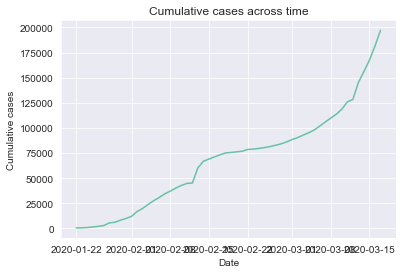

In [4]:
# line plot of cumulative cases vs. date

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(data=confirmed_cases_worldwide, x="date", y="cum_cases")

plt.title('Cumulative cases across time')
plt.xlabel('Date')
plt.ylabel('Cumulative cases')
plt.show()

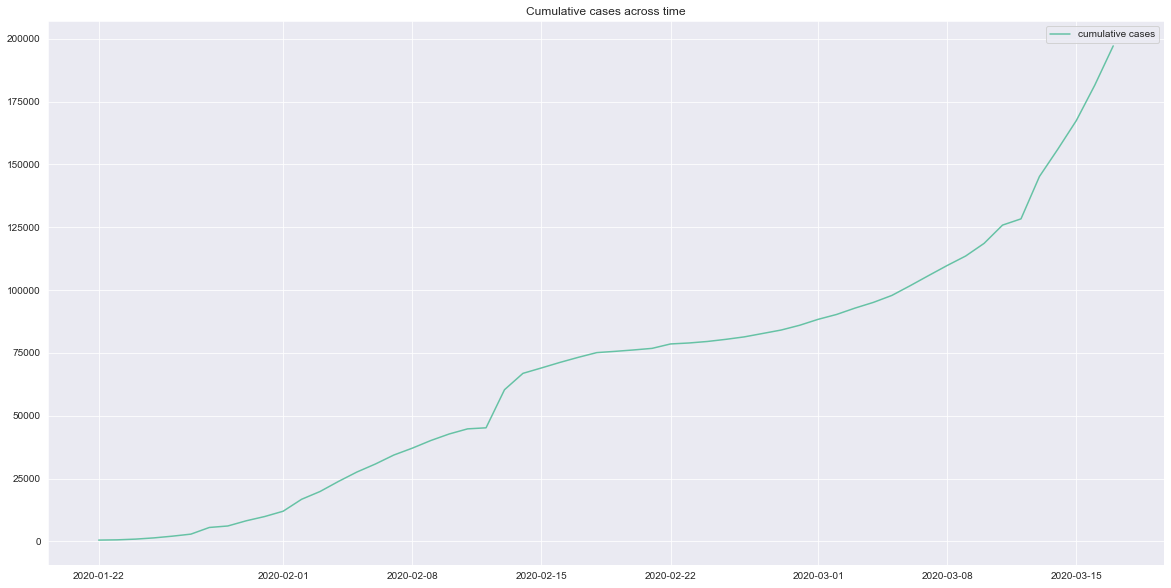

In [5]:
plt.figure(figsize = (20, 10))         #resizing

plt.title('Cumulative cases across time')

plt.plot(confirmed_cases_worldwide.date, confirmed_cases_worldwide.cum_cases, label = 'cumulative cases')
plt.legend()